# Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [1]:
from wcs_helper_functions import *
from collections import Counter
from matplotlib import colors

Import relevant Python libraries.

In [2]:
import numpy as np
from scipy import stats
from random import random
import os
%matplotlib inline

## Import all the necessary data from the WCS Archive

In [26]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')
indexCoord = munsellInfo[1]

In [4]:
dictData = readDictFile('./WCS_data_core/dict.txt')

In [27]:
# print(dictData)

In [9]:
namingData = readNamingData('./WCS_data_core/term.txt')

## Preparation

**Categorization**

For each of the 110 languages, find the most common answer for each chip. If this answer exceeds 61%, then record the answer for that color chip, and if not, record an empty string. Display the result for each color chip with a table with lightness as rows and hues as columns.

1


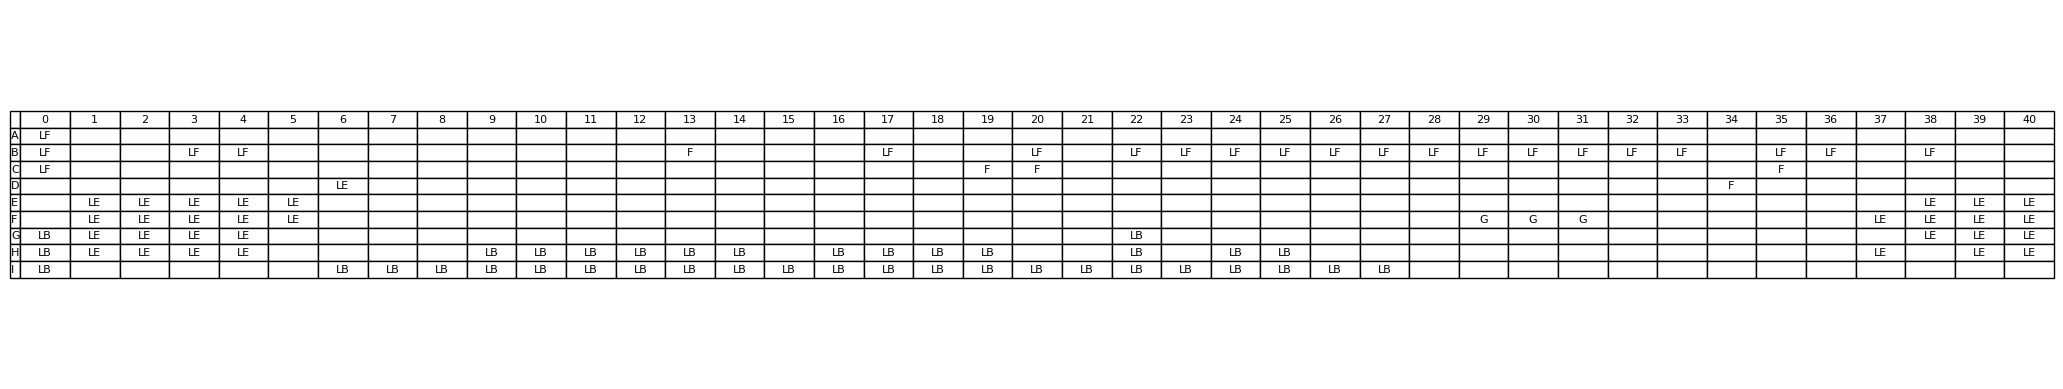

{'F', 'LF', 'G', 'LB'}
['fwae', 'lofu', 'gale', 'lobu']
2


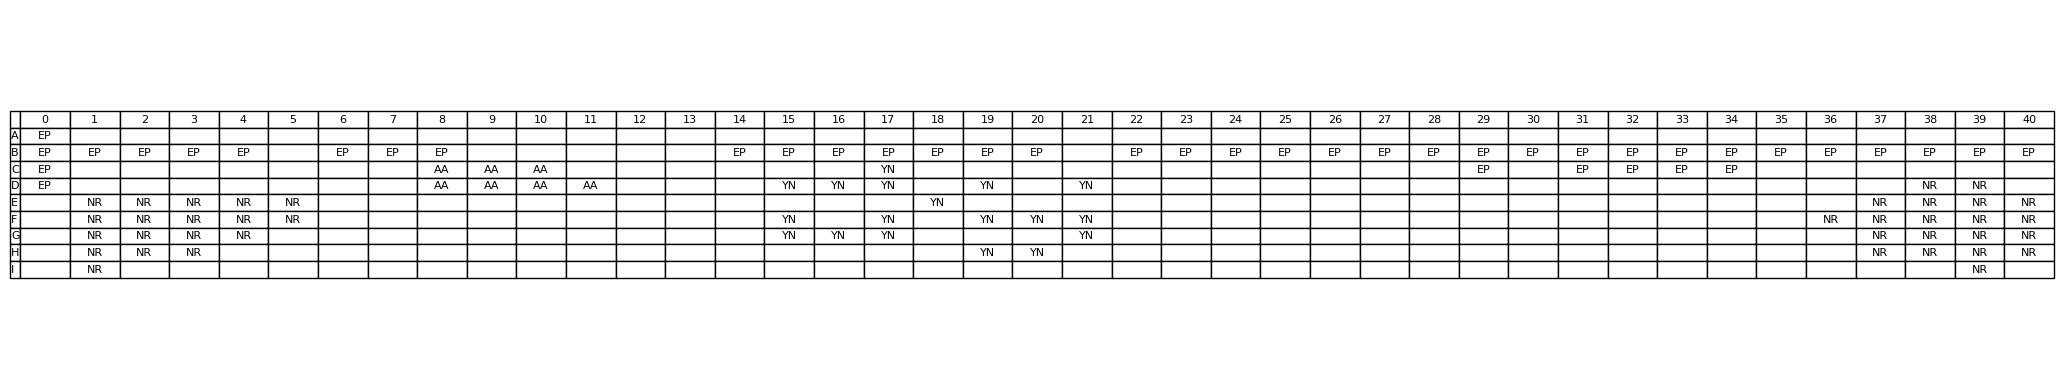

{'YN', 'EP'}
['yaaenaa(ren)', 'epanten']
3


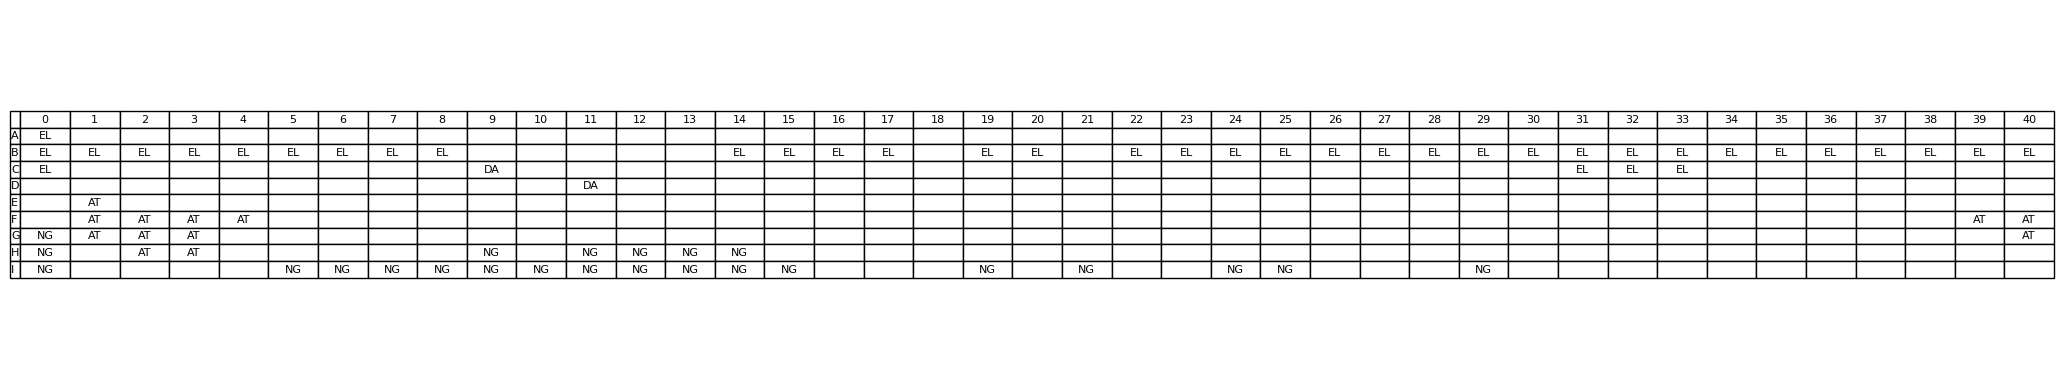

{'EL', 'NG'}
['melatak', 'mengitet']
4


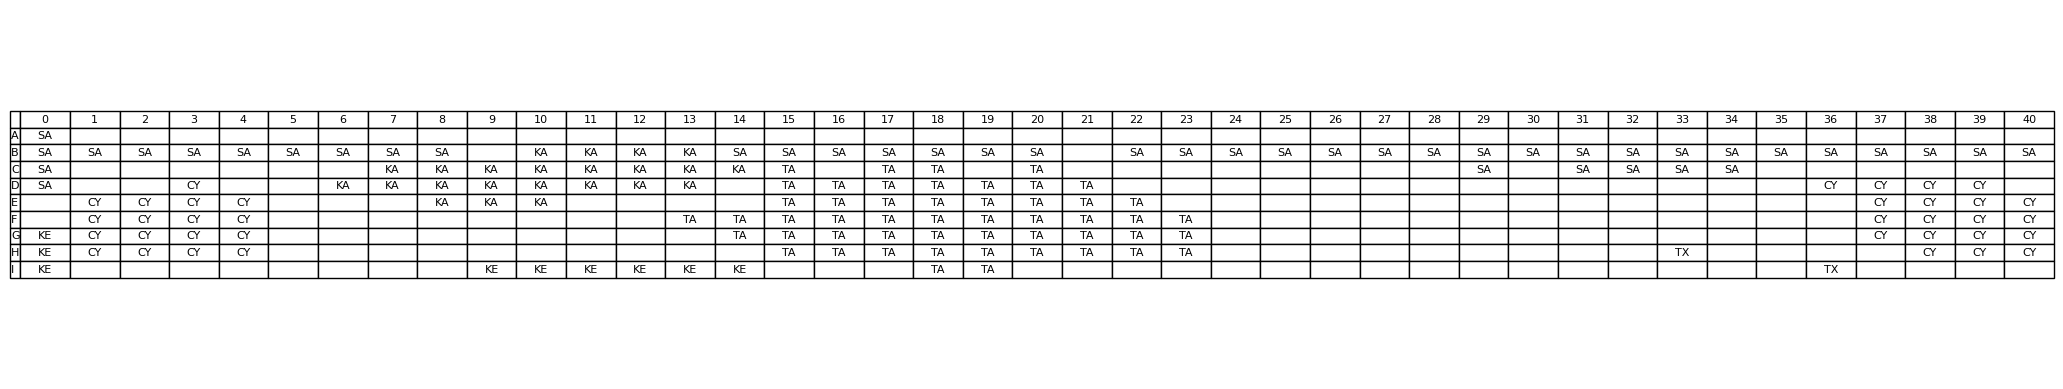

{'TA', 'SA', 'KA', 'KE'}
["txa'x", 'sak', "k'an", "k'ek"]
5


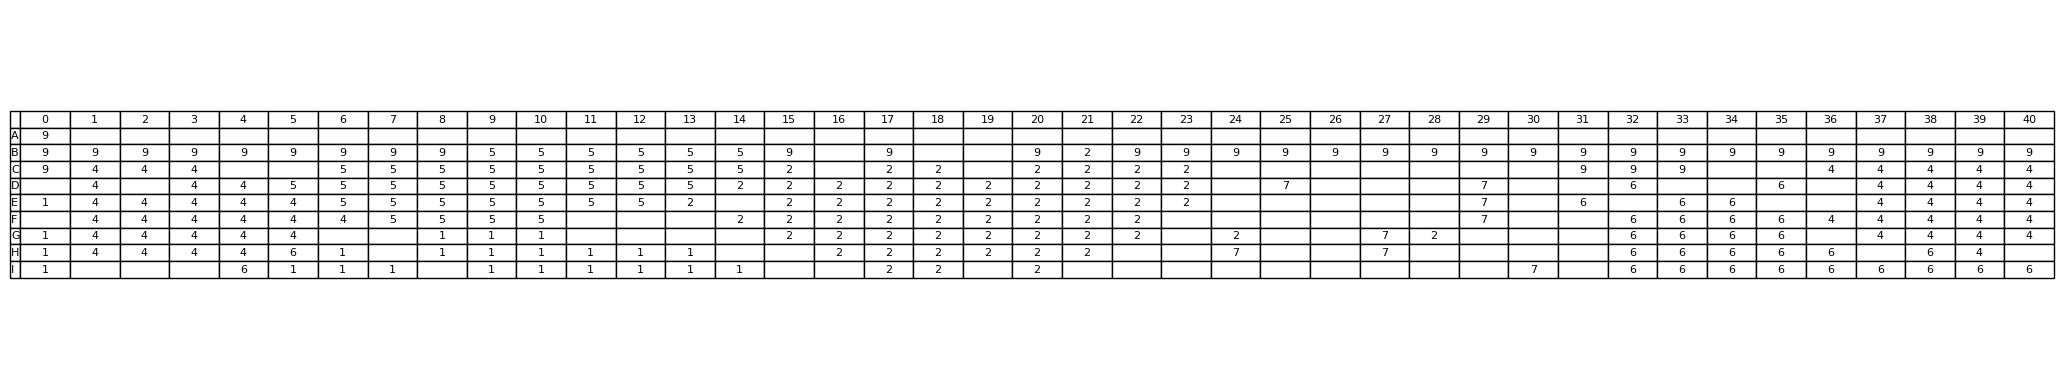

{'2', '9', '7', '5', '1'}
['burada', 'keregda', 'kihueyda', 'jeida', 'sikda']
6


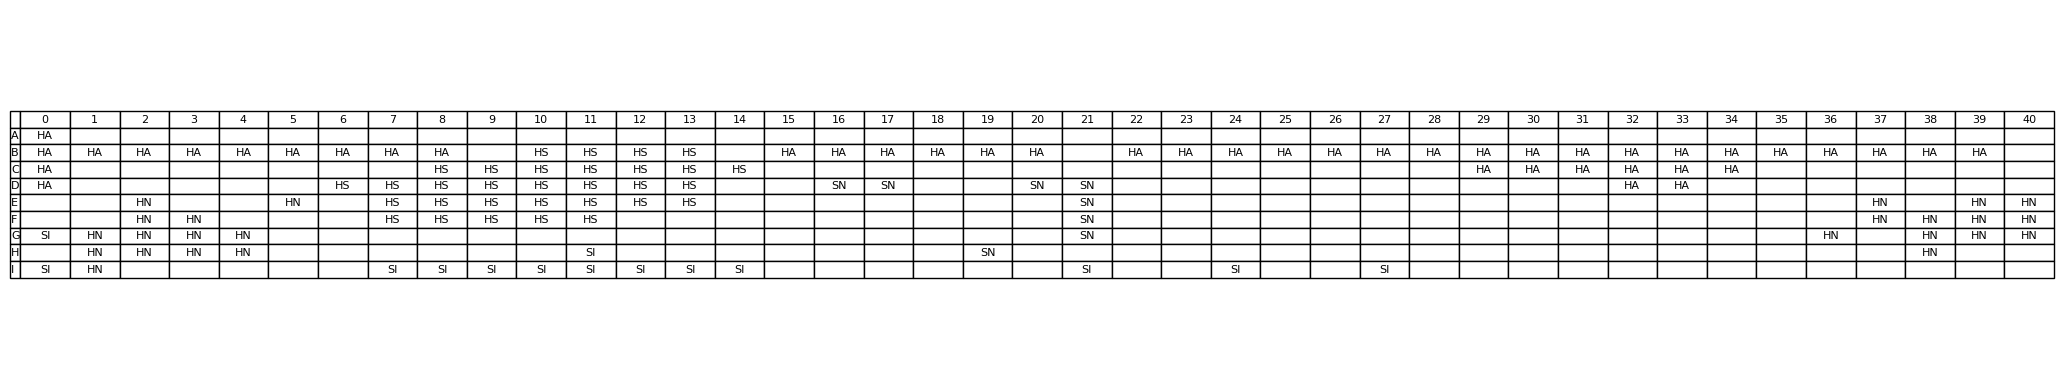

{'HA', 'HS', 'SI', 'SN'}
['halojo', 'hwosimijo', "sikwo'mno", 'sontijo']
7


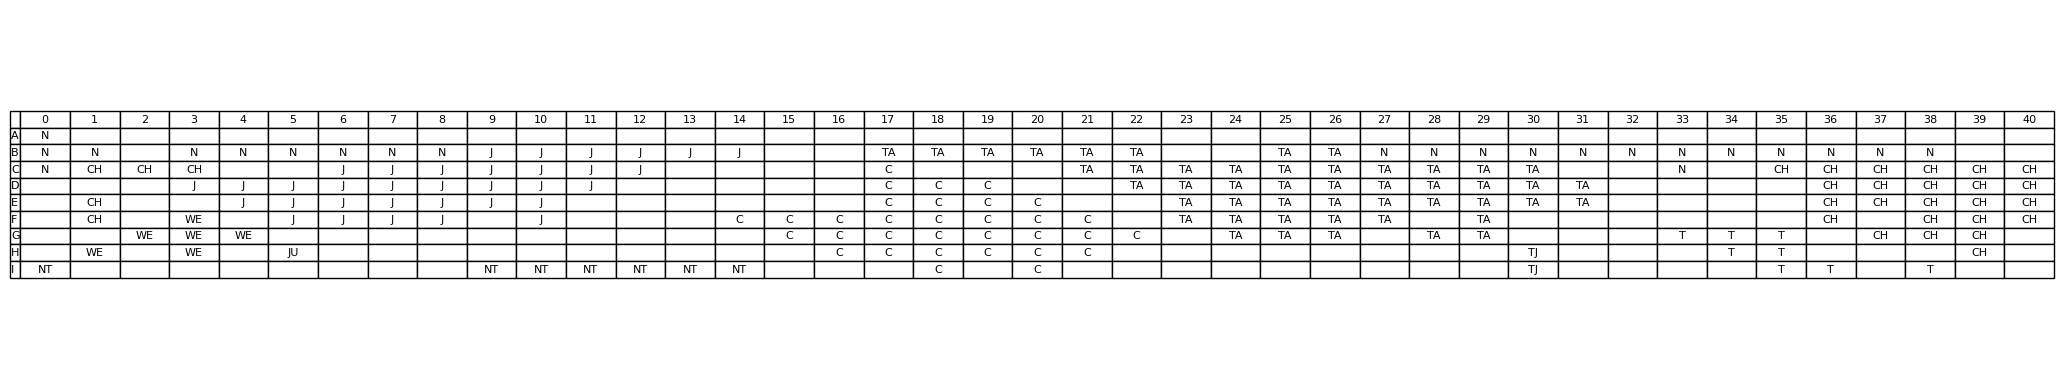

{'J', 'TA', 'NT', 'N', 'C'}
['cajan23', 'tsa3', 'ntom3', "canchii'44-3", "cachuii'24-3"]
8


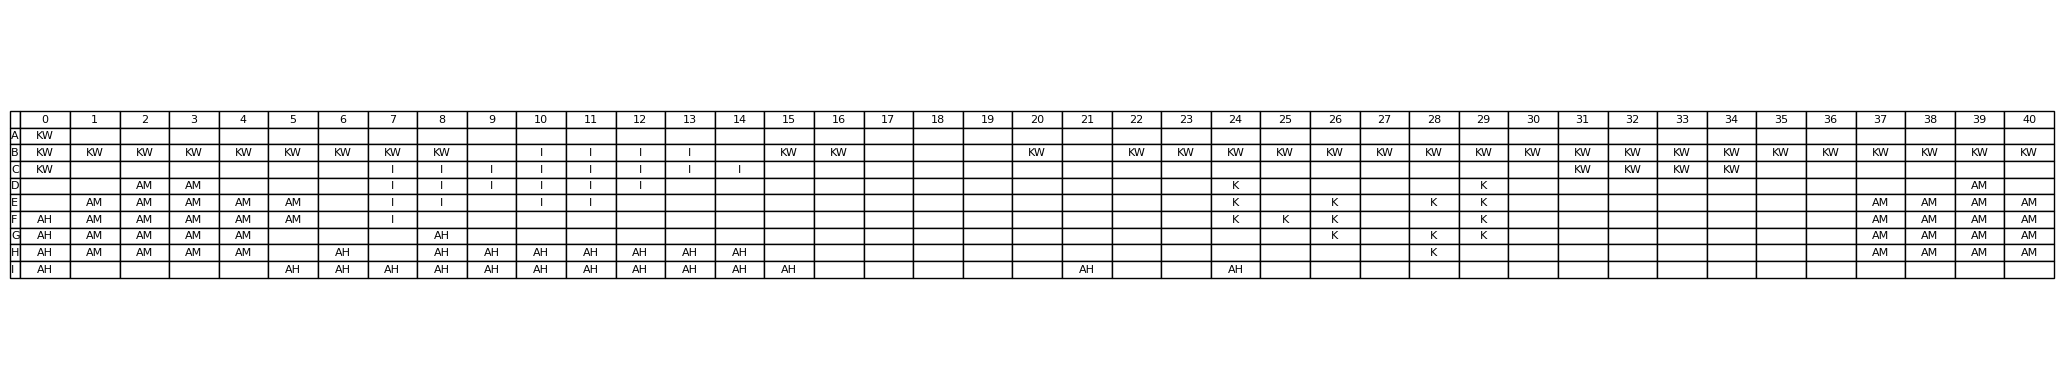

{'KW', 'AH', 'K', 'I'}
['kwihepihante', 'asihintihante', 'kwanyapisitipate', 'ikirihante']
9


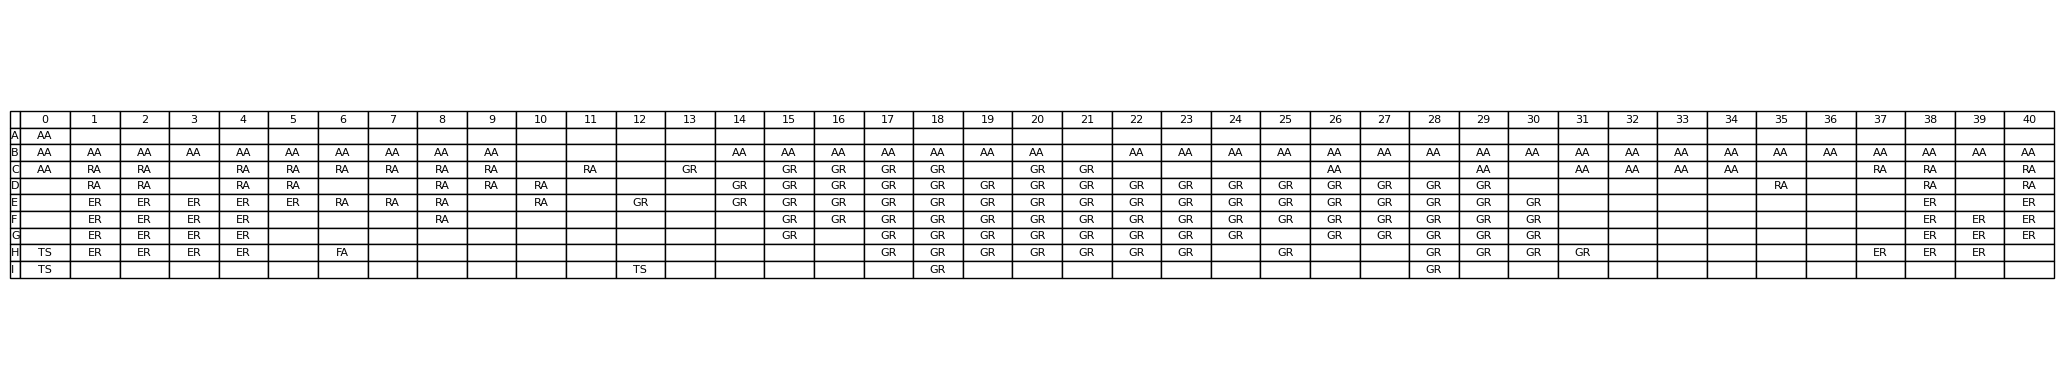

{'AA', 'GR'}
['aka', 'grÃ£grÃ£']
10


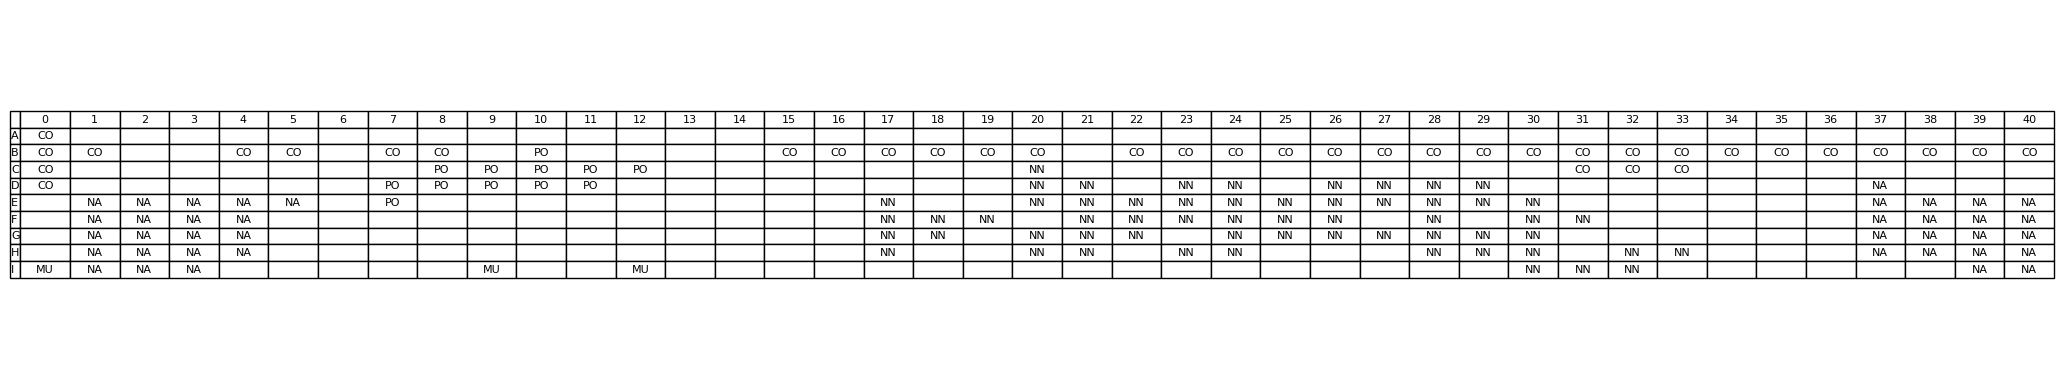

{'CO', 'NN'}
['cohuaja', 'nentuca']
11


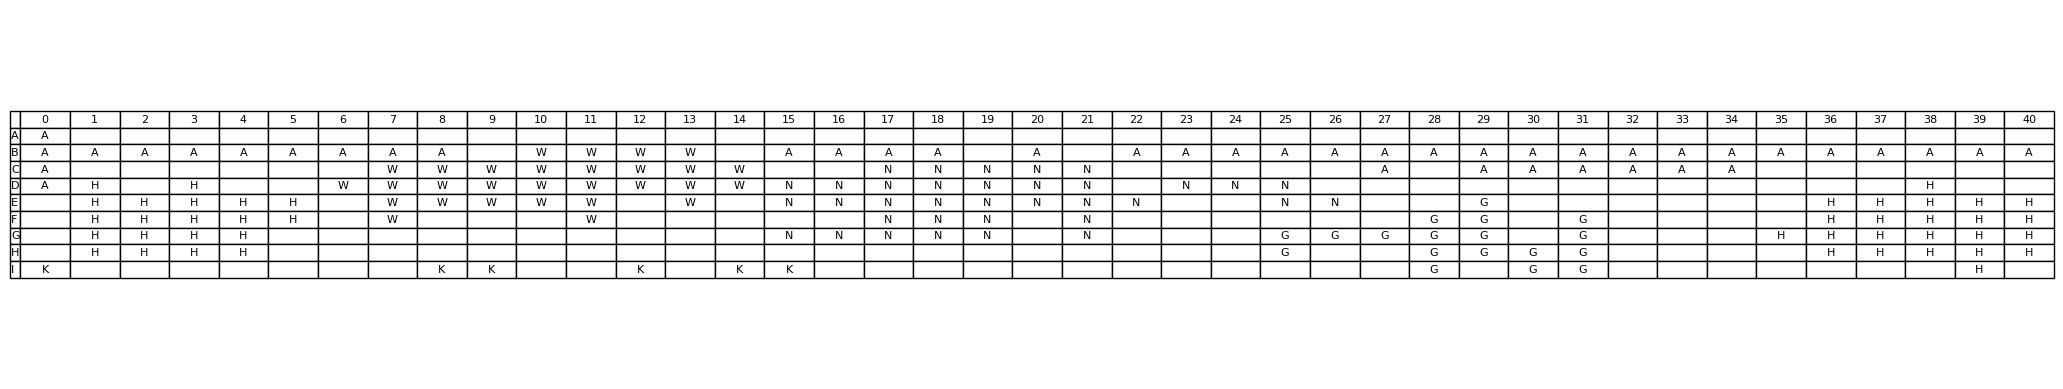

{'A', 'N', 'W', 'G', 'K'}
['gai', 'nel', 'gwedi', 'ginal', 'kel']
12


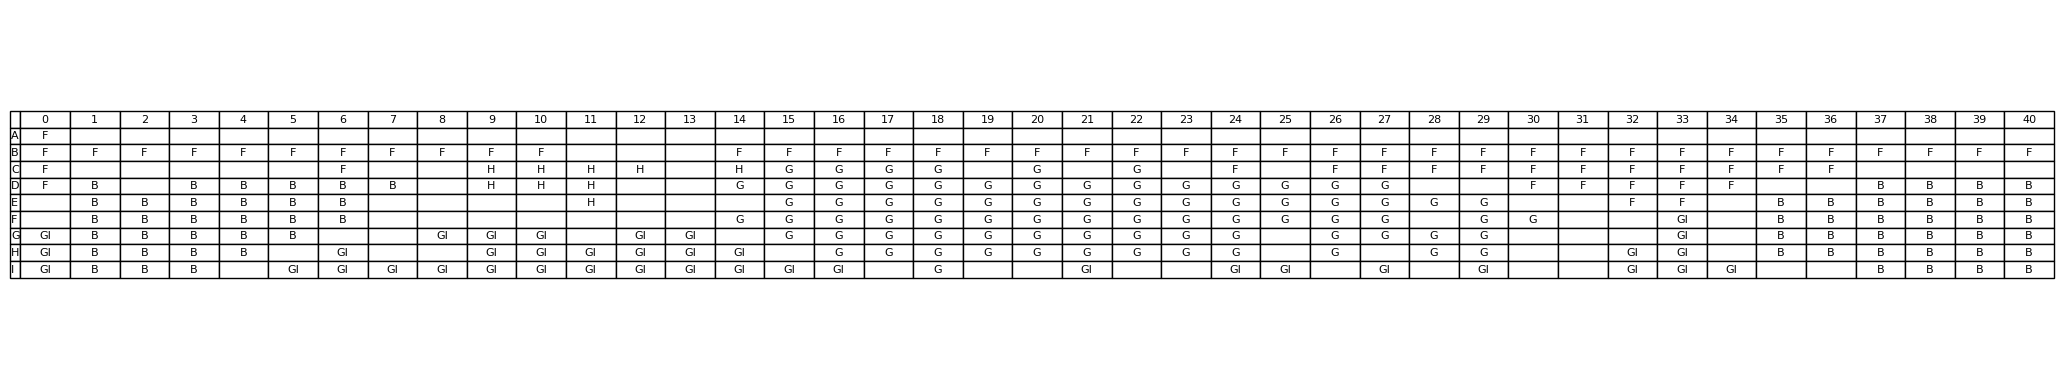

{'F', 'H', 'GI', 'G'}
['fauhana', 'hualihona', 'gihobuna', 'gahana']
13


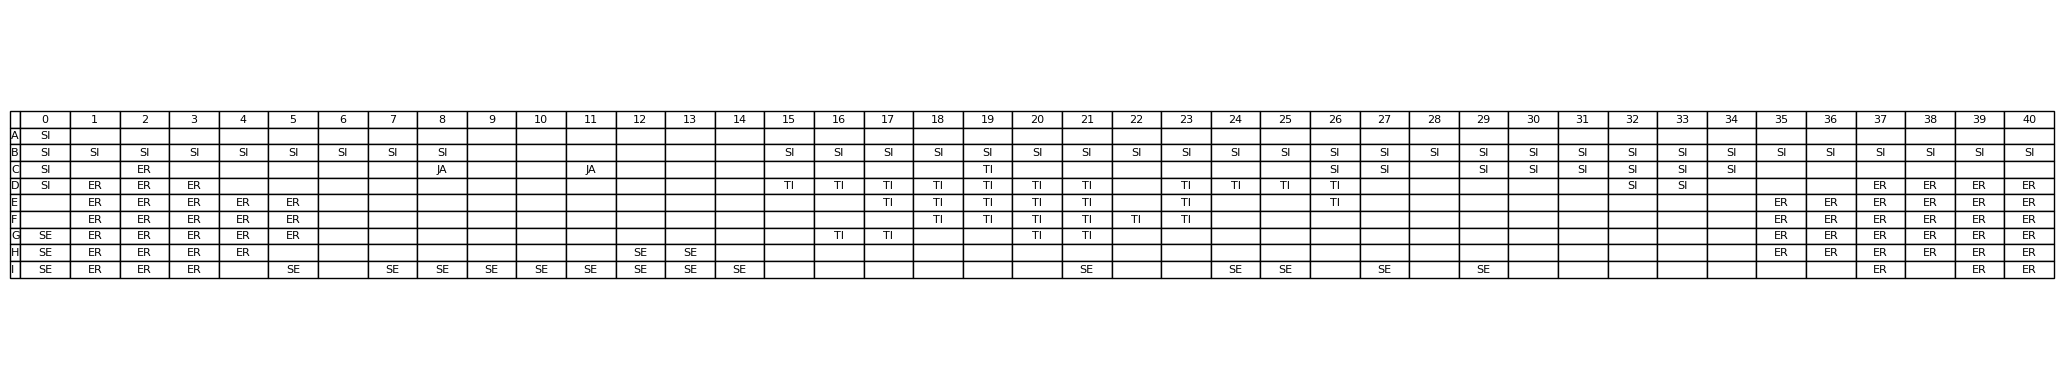

{'SE', 'TI', 'SI'}
['seyseye', 'tialaikikini', 'sinsini']
14


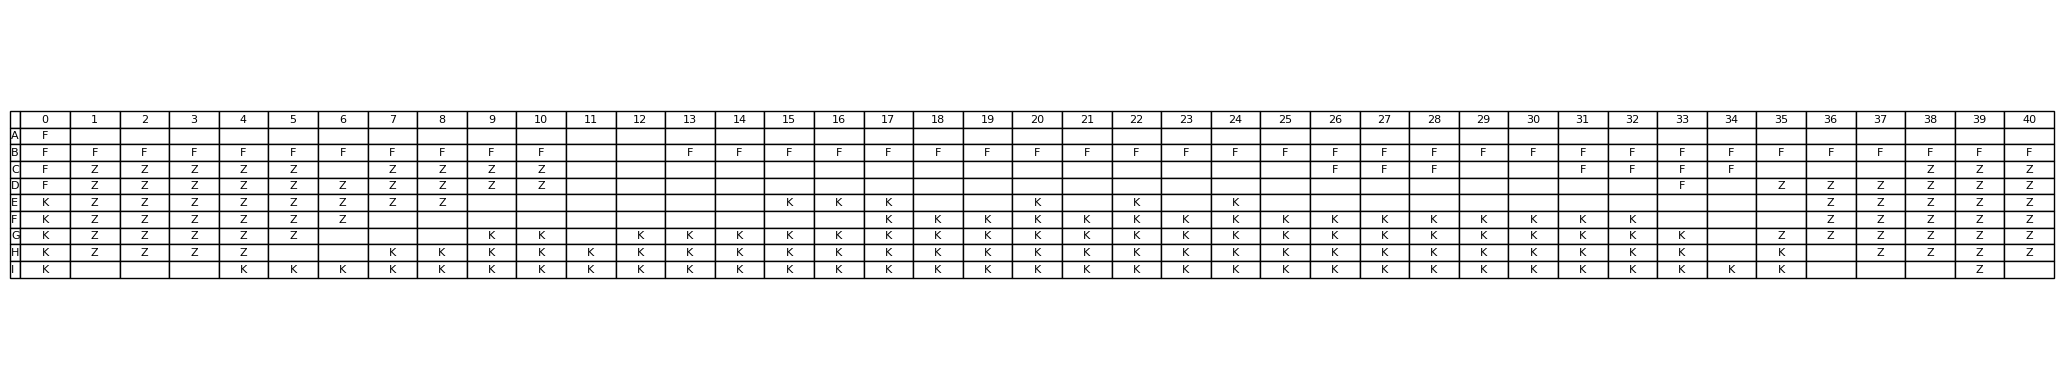

{'F', 'K'}
['fee(ku)', 'kp']
15


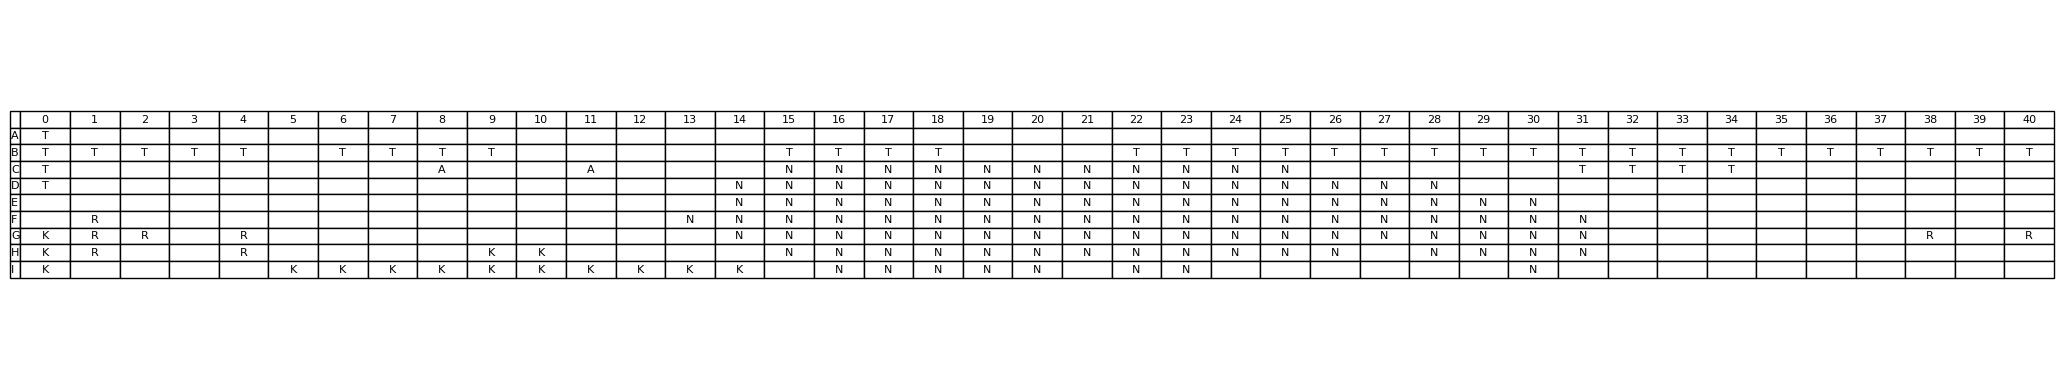

{'K', 'N', 'T'}
['kal', 'nil', 'tÉ”lÉ”']
16


KeyboardInterrupt: 

In [10]:
for k in range(1,111):
    # 110 languages
    answers = {}
    
    for i in range(1,331):
        # 330 color chips
        answers[i] = []
    
    lang = namingData[k]
    
    s = len(lang)

    for i in range(1, s+1):
        # For each speaker of that language
        for j in range(1,331):
            # For each color chip, append the answer
            answers[j].append(lang[i][j])

    for i in range(1,331):
        # Find the most common answer for that color chip given by all the speakers
        string_counts = Counter(answers[i])
        most_common_strings = string_counts.most_common(1)
        if most_common_strings:
            most_common_string, occurrence = most_common_strings[0]
            if occurrence / len(answers[i]) >= 0.61:
                answers[i] = most_common_string
            else:
                answers[i] = ''

    data = {indexCoord[key]: value for key, value in answers.items()}
    # Create a figure and axis
    fig, ax = plt.subplots()
    blueandgreen = set()
    # Create a table with custom axis labels
    table_data = [[str(i) for i in range(0, 41)]]  # First row with empty cell and numerical labels
    for x_label in 'ABCDEFGHI':  
        row_data = [x_label] + ['' for _ in range(40)]  # Initialize row with x-axis label
        for coord, value in data.items():
            if x_label == coord[0]:
                row_data[int(coord[1])] = value  # Set the corresponding cell value
                if 13 <= int(coord[1]) <= 29 and value:
                    blueandgreen.add(value)
        table_data.append(row_data)

    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.1] * 41, rowLabels=[''] + list('ABCDEFGHI'))
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    # Hide the axes
    ax.axis('off')
    
    print(k)

    # Show the plot
    plt.show()
    print(blueandgreen)
    translatedWords = []
    for word in blueandgreen:
        translatedWords.append(translate(dictData, k, word))
    print(translatedWords)


**UV-B Incidence**

In [11]:
uv_dict = {}
counter = 0
currLat = ''
lat = 0
total = 0
# Loop over daily files, and sum the UV-B incidence for that specific (lat, long)
for filename in os.listdir('./WCS_data_core/L3'):
    f = os.path.join('./WCS_data_core/L3', filename)
    if f != './WCS_data_core/L3/.ipynb_checkpoints':
        total += 1
        fileHandler = open(f,'r')
        next(fileHandler)
        next(fileHandler)
        next(fileHandler)
        for line in fileHandler:
            counter+= 1

            if 1 <= counter <= 12:
                if counter < 12:
                    currLat += line.strip()

                else:
                    currLat += line.strip(' ').split()[0]
                    lat = float(line.strip('=').split()[-1])
                    long = -179.375
                    for i in range(288):
                        if (lat, long) in uv_dict:
                            uv_dict[(lat, long)] += int(currLat[i*3:i*3+3])
                        else:
                            uv_dict[(lat, long)] = int(currLat[i*3:i*3+3])
                        long += 1.25  

                    counter = 0
                    currLat = ''

# Calculate the average
for i in uv_dict:
    uv_dict[i] = int(uv_dict[i]) / total

# print(uv_dict)

{(-89.5, -179.375): 993.8571428571429, (-89.5, -178.125): 983.1160714285714, (-89.5, -176.875): 988.6279761904761, (-89.5, -175.625): 993.9404761904761, (-89.5, -174.375): 988.4821428571429, (-89.5, -173.125): 978.0297619047619, (-89.5, -171.875): 980.9613095238095, (-89.5, -170.625): 988.4910714285714, (-89.5, -169.375): 983.0357142857143, (-89.5, -168.125): 978.1755952380952, (-89.5, -166.875): 978.1904761904761, (-89.5, -165.625): 978.139880952381, (-89.5, -164.375): 980.8065476190476, (-89.5, -163.125): 988.6875, (-89.5, -161.875): 996.4404761904761, (-89.5, -160.625): 988.639880952381, (-89.5, -159.375): 990.7202380952381, (-89.5, -158.125): 991.0654761904761, (-89.5, -156.875): 993.7202380952381, (-89.5, -155.625): 975.4940476190476, (-89.5, -154.375): 985.8541666666666, (-89.5, -153.125): 985.9791666666666, (-89.5, -151.875): 996.4345238095239, (-89.5, -150.625): 983.3363095238095, (-89.5, -149.375): 980.6666666666666, (-89.5, -148.125): 985.889880952381, (-89.5, -146.875): 982.

Import categories and coordinates that are acquired in previous steps

In [47]:
coord = {}
cat = {}
filename = './WCS_data_core/cog260_cat_uv.txt'

analysisData = {}
with open(filename, 'r') as file:
    next(file)
    for line in file:
        lineElements = line.split()  
        analysisData[int(lineElements[0])] = [float(lineElements[3]),
                                          float(lineElements[4]), lineElements[2], 0]


Clean latitude and longitude data to fit into coordinates provided from the data

In [48]:
lat_list = []
long_list = []

for i in range(180):
    lat_list.append(-89.5 + i)
for i in range(288):
    long_list.append(-179.375 + i* 1.25)

cleaned_coord = {}
for i in analysisData:
    lat = analysisData[i][0]
    long = analysisData[i][1]
    cat = analysisData[i][2]
    analysisData[i] = [take_closest(lat_list, lat), take_closest(long_list, long), cat, 0]

# Find the UV-B incidence for the cleaned coordinates for each language
for i in analysisData:
    analysisData[i][3] = uv_dict[(analysisData[i][0], analysisData[i][1])]

In [49]:
# print(analysisData)

## Analysis

In [50]:
import numpy as np
# Prototype

cat0 = {}
cat1 = {}
for i in range(1,111):
    if analysisData[i][2] == 'yes':
        cat1[i] = analysisData[i][3]
    else:
        cat0[i] = analysisData[i][3]

m0 = np.median(list(cat0))
m1 = np.median(list(cat1))
correctness = []
for i in cat0:
    med0 = list(cat0.values())
    med0.remove(cat0[i])
    m0 = np.median(med0)
    
    # Calculate the distance of the test point to their respective median
    d0 = abs(m0 - cat0[i])
    d1 = abs(m1 - cat0[i])
    
    if d0 < d1:
        correctness.append(True)
    else:
        correctness.append(False)
        
for j in cat1:
    med1 = list(cat1.values())
    med1.remove(cat1[j])
    m1 = np.median(med1)
    
        # Calculate the distance of the test point to their respective median
    d0 = abs(m0 - cat1[j])
    d1 = abs(m1 - cat1[j])
    
    if d0 < d1:
        correctness.append(False)
    else:
        correctness.append(True)
    
pro = sum(correctness) / len(correctness)
print(pro)

0.8818181818181818


In [51]:
# Exemplar
exemplar = []
exemplar_correctness = []
for i in range(1,111):
    total0 = 0
    for vec in cat0:
        dist = abs(cat0[vec] - analysisData[i][3])
        sim = np.exp(-(dist**2))
        total0 += sim
        
    total1 = 0
    for vec in cat1:
        dist = abs(cat1[vec] - analysisData[i][3])
        sim = np.exp(-(dist**2))
        total1 += sim
        
    c0 = total0 / len(cat0)
    c1 = total1 / len(cat1)
    
    if c0 > c1:
        # cat 0 - no
        exemplar.append('no')
        exemplar_correctness.append(analysisData[i][2] == 'no')
        
    else:
        # cat 1 - yes
        exemplar.append('yes')
        exemplar_correctness.append(analysisData[i][2] == 'yes')
        
exem = sum(exemplar_correctness) / len(exemplar_correctness)
print(exem)

0.8090909090909091


## Results

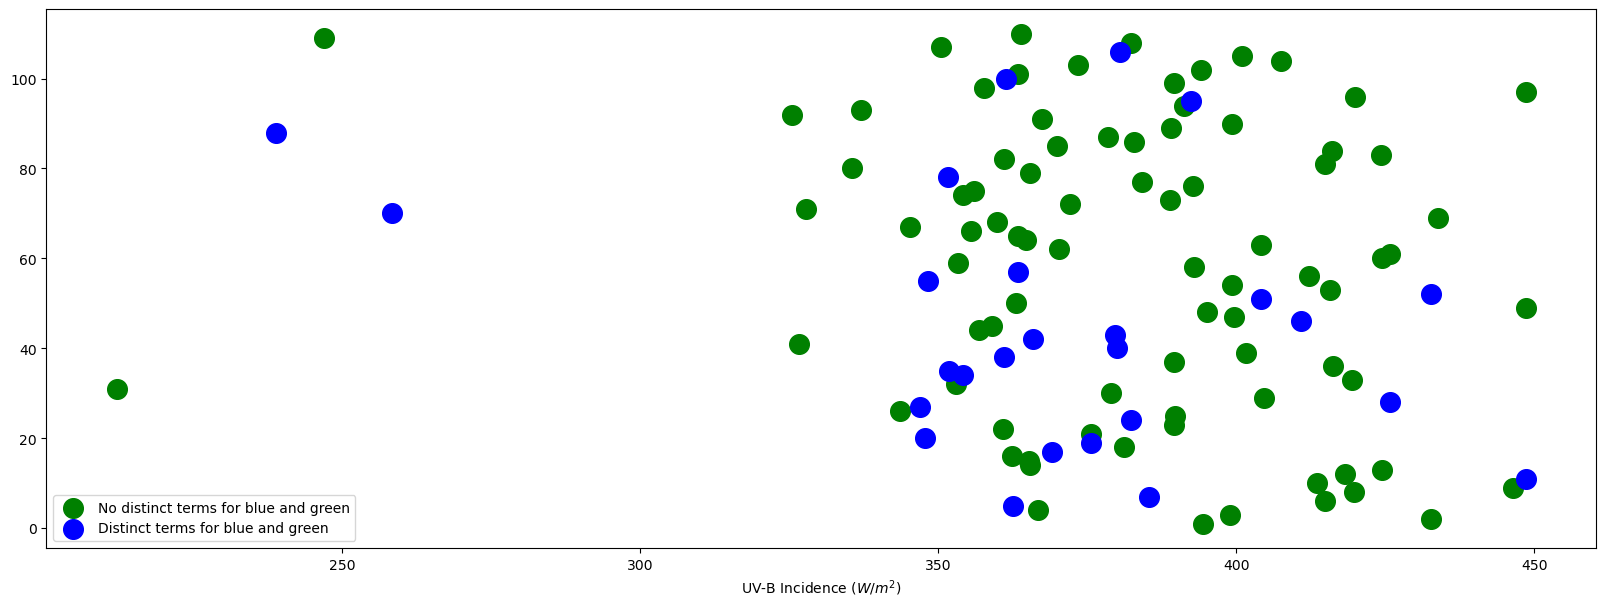

In [52]:
# Create a figure
fig = plt.figure(figsize=(20, 7))

# Plot markers for cat0 with flipped axes
plt.scatter(cat0.values(), list(cat0.keys()), c='green', s=200)

# Plot markers for cat1 with flipped axes
plt.scatter(cat1.values(), list(cat1.keys()), c='blue', s=200, label = "Yes")


plt.xlabel(r"UV-B Incidence ($W/m^2$)")
plt.legend(["No distinct terms for blue and green", "Distinct terms for blue and green"], loc = "lower left")
# Show the plot
plt.show()

In [53]:
print("There are " + str(len(cat0)) + " languages that have no distinct terms for blue and green and " + str(len(cat1)) + " languages that have distinct terms for blue and green.")

There are 84 languages that have no distinct terms for blue and green and 26 languages that have distinct terms for blue and green.


In [54]:
from decimal import Decimal

print("The predictive accuracy of the prototype model is " + str(round(pro * 100, 2)) + "%.")
print("The predictive accuracy of the exemplar model is " + str(round(exem * 100, 2)) + "%.")

The predictive accuracy of the prototype model is 88.18%.
The predictive accuracy of the exemplar model is 80.91%.


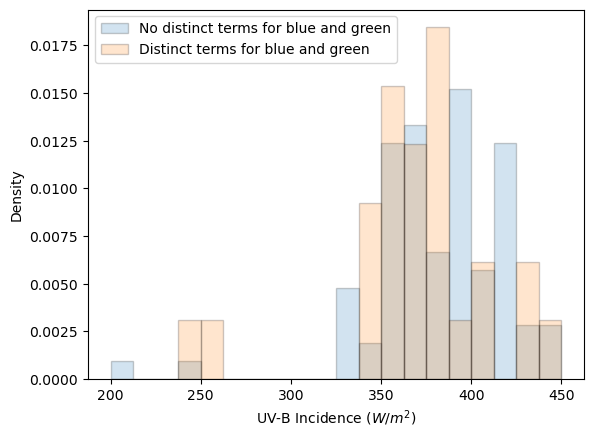

In [55]:
plt.hist(cat0.values(), range = [200, 450], bins = 20, edgecolor = "black", alpha = 0.2, density = True)

plt.hist(cat1.values(), range = [200, 450], bins = 20, edgecolor = "black", alpha = 0.2, density = True)
plt.legend(["No distinct terms for blue and green", "Distinct terms for blue and green"])
plt.xlabel(r"UV-B Incidence ($W/m^2$)")
plt.ylabel("Density")
plt.show()

In [56]:
mn0 = sum(cat0.values()) / len(cat0)
mn1 = sum(cat1.values()) / len(cat1)
print ("The mean UV-B incidence of category 0 is " + str(round(mn0, 2)) + " and the mean UV-B incidence of category 1 is " + str(round(mn1, 2)))

The mean UV-B incidence of category 0 is 381.41 and the mean UV-B incidence of category 1 is 368.4
